In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install imblearn

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn import metrics
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold

In [4]:
data = pd.read_csv("AdultCensus.csv")
data.head()

,Age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
var, counts=np.unique(data['Workclass'], return_counts=True)
most_freq_var = var[np.argmax(counts, axis = 0)]
data['Workclass'][data['Workclass'] == '?'] = most_freq_var 

In [6]:
var, counts=np.unique(data['Workclass'], return_counts=True)
most_freq_var = var[np.argmax(counts, axis = 0)]
data['Workclass'][data['Workclass'] == '?'] = most_freq_var 

In [7]:
var, counts=np.unique(data['occupation'], return_counts=True)
most_freq_var = var[np.argmax(counts, axis = 0)]
data['occupation'][data['occupation'] == '?'] = most_freq_var 

In [8]:
var, counts=np.unique(data['native-country'], return_counts=True)
most_freq_var = var[np.argmax(counts, axis = 0)]
data['native-country'][data['native-country'] == '?'] = most_freq_var 

In [9]:
data.head(100)

,Age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


In [10]:
HighSchool_Grad = [' HS-grad',' 12th',' 11th',' 10th',' 9th']
Elementary = [' 1st-4th',' 5th-6th',' 7th-8th']

In [11]:
data['education'].replace(to_replace = HighSchool_Grad,value = 'HighSchool-Grad',inplace = True)
data['education'].replace(to_replace = Elementary,value = 'elementary_school',inplace = True)

data['education'].value_counts()

HighSchool-Grad      13556
 Some-college         7291
 Bachelors            5355
 Masters              1723
 Assoc-voc            1382
elementary_school     1147
 Assoc-acdm           1067
 Prof-school           576
 Doctorate             413
 Preschool              51
Name: education, dtype: int64

In [12]:
married= [' Married-spouse-absent',' Married-civ-spouse',' Married-AF-spouse']
separated = [' Separated',' Divorced']

#replace elements in list.
data['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)

data['marital-status'].value_counts()

Married           15417
 Never-married    10683
Separated          5468
 Widowed            993
Name: marital-status, dtype: int64

In [13]:
self_employed = [' Self-emp-not-inc',' Self-emp-inc']
govt_employees = [' Local-gov',' State-gov',' Federal-gov']

#replace elements in list.
data['Workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data['Workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data['Workclass'].value_counts()

 Private          22696
Govt_employees     4351
Self_employed      3657
 ?                 1836
 Without-pay         14
 Never-worked         7
Name: Workclass, dtype: int64

In [14]:
del_cols = ['education-num']
data.drop(labels = del_cols,axis = 1,inplace = True)

In [15]:
num_col_new = ['Age','capital-gain', 'capital-loss',
       'hours-per-week','fnlwgt']
cat_col_new = ['Workclass', 'education', 'marital-status', 'occupation','relationship',
               'race', 'sex', 'income']

In [16]:
data.head()


,Age,Workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Govt_employees,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self_employed,83311,Bachelors,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HighSchool-Grad,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,HighSchool-Grad,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
print(f"Target: 'Income'\nUnique Values in Income: {data.income.unique()}\nNumber of unique values: {data.income.nunique()}")

Target: 'Income'
Unique Values in Income: [' <=50K' ' >50K']
Number of unique values: 2


In [18]:
data['income'] = data['income'].str.replace('<=50K', '0')
data['income'] = data['income'].str.replace('>50K', '1')
data['income'] = data['income'].astype(np.int64)


In [19]:
data.income.dtypes

dtype('int64')

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

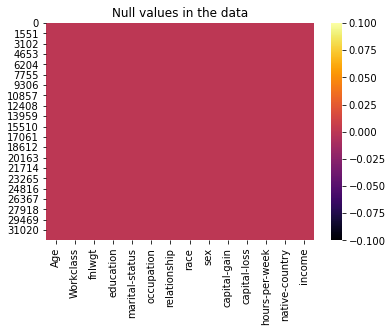

In [21]:
plt.title("Null values in the data", fontsize = 12)
sns.heatmap(data.isnull(), cmap = 'inferno')
plt.show()

In [22]:
print("Datatype of every feature: ")
data.dtypes

Datatype of every feature: 


Age                int64
Workclass         object
fnlwgt             int64
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [23]:
print("Number of unique values in every feature: ")
data.nunique()

Number of unique values in every feature: 


Age                  73
Workclass             6
fnlwgt            21648
education            10
marital-status        4
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [24]:
data.describe()

,Age,fnlwgt,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000,1.000000


In [25]:
data['occupation'] = data['occupation'].replace(' ?', data['occupation'].mode()[0])
data['Workclass'] = data['Workclass'].replace(' ?', data['Workclass'].mode()[0])
data['native-country'] = data['native-country'].replace(' ?', data['native-country'].mode()[0])


In [26]:
data['Workclass'].value_counts()

 Private          24532
Govt_employees     4351
Self_employed      3657
 Without-pay         14
 Never-worked         7
Name: Workclass, dtype: int64

In [27]:
data['occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [28]:
data['native-country'].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [29]:
ds = data.copy()

In [30]:
ds.head(100)

,Age,Workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Govt_employees,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self_employed,83311,Bachelors,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HighSchool-Grad,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,HighSchool-Grad,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Govt_employees,115585,Some-college,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
96,48,Self_employed,191277,Doctorate,Married,Prof-specialty,Husband,White,Male,0,1902,60,United-States,1
97,37,Private,202683,Some-college,Married,Sales,Husband,White,Male,0,0,48,United-States,1
98,48,Private,171095,Assoc-acdm,Separated,Exec-managerial,Unmarried,White,Female,0,0,40,England,0


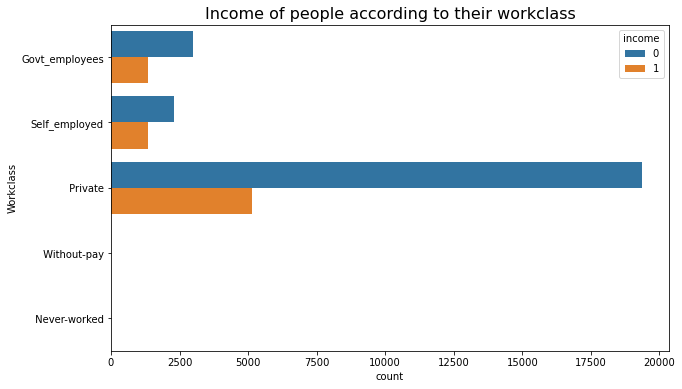

In [31]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their workclass", fontsize = 16)
sns.countplot(y = ds['Workclass'], hue = ds['income'])
plt.show()

In [32]:
workclass_enc = (ds.groupby('Workclass').size()) / len(ds)
print(workclass_enc)

ds['workclass_enc'] = ds['Workclass'].apply(lambda x : workclass_enc[x])
ds['workclass_enc'].head(100)

Workclass
 Never-worked     0.000215
 Private          0.753417
 Without-pay      0.000430
Govt_employees    0.133626
Self_employed     0.112312
dtype: float64


0     0.133626
1     0.112312
2     0.753417
3     0.753417
4     0.753417
        ...   
95    0.133626
96    0.112312
97    0.753417
98    0.753417
99    0.133626
Name: workclass_enc, Length: 100, dtype: float64

In [33]:
ds.drop(['Workclass'], axis = 1, inplace = True)

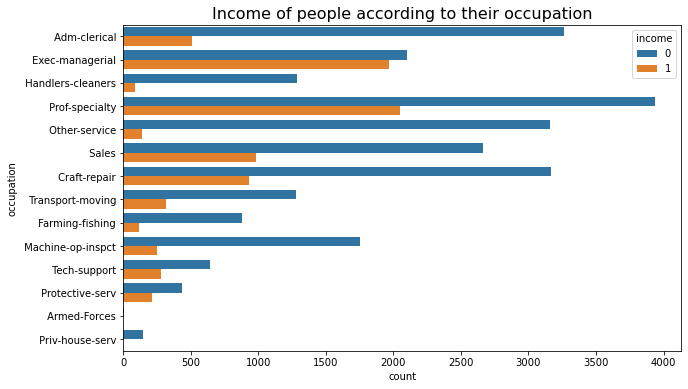

In [34]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = ds['occupation'], hue = ds['income'])
plt.show()

In [35]:
occupation_enc = (ds.groupby('occupation').size()) / len(ds)
print(occupation_enc)

ds['occupation_enc'] = ds['occupation'].apply(lambda x : occupation_enc[x])
ds['occupation_enc'].head(100)

occupation
 Adm-clerical         0.115783
 Armed-Forces         0.000276
 Craft-repair         0.125887
 Exec-managerial      0.124873
 Farming-fishing      0.030527
 Handlers-cleaners    0.042075
 Machine-op-inspct    0.061485
 Other-service        0.101195
 Priv-house-serv      0.004576
 Prof-specialty       0.183747
 Protective-serv      0.019932
 Sales                0.112097
 Tech-support         0.028500
 Transport-moving     0.049046
dtype: float64


0     0.115783
1     0.124873
2     0.042075
3     0.042075
4     0.183747
        ...   
95    0.042075
96    0.183747
97    0.112097
98    0.124873
99    0.101195
Name: occupation_enc, Length: 100, dtype: float64

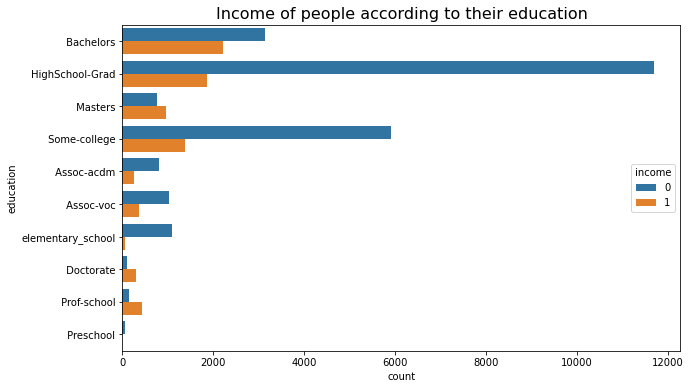

In [36]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their education", fontsize = 16)
sns.countplot(y = ds['education'], hue = ds['income'])
plt.show()

In [37]:
education_enc = (ds.groupby('education').size()) / len(ds)
print(education_enc)

ds['education_enc'] = ds['education'].apply(lambda x : education_enc[x])
ds['education_enc'].head(100)

education
 Assoc-acdm          0.032769
 Assoc-voc           0.042443
 Bachelors           0.164461
 Doctorate           0.012684
 Masters             0.052916
 Preschool           0.001566
 Prof-school         0.017690
 Some-college        0.223918
HighSchool-Grad      0.416326
elementary_school    0.035226
dtype: float64


0     0.164461
1     0.164461
2     0.416326
3     0.416326
4     0.164461
        ...   
95    0.223918
96    0.012684
97    0.223918
98    0.032769
99    0.416326
Name: education_enc, Length: 100, dtype: float64

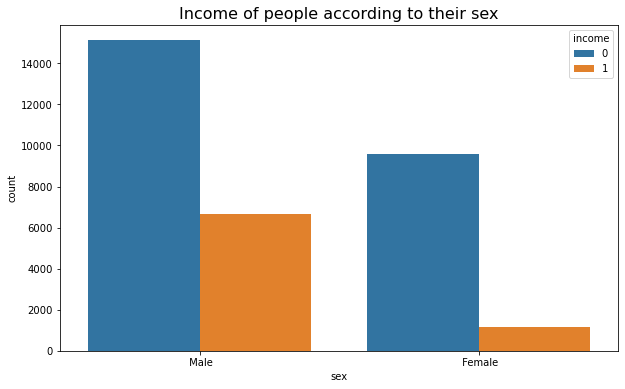

In [38]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their sex", fontsize = 16)
sns.countplot(x = ds['sex'], hue = ds['income'])
plt.show()

In [39]:
sex_enc = (ds.groupby('sex').size()) / len(ds)
print(sex_enc)

ds['sex_enc'] = ds['sex'].apply(lambda x : sex_enc[x])
ds['sex_enc'].head(100)

sex
 Female    0.330795
 Male      0.669205
dtype: float64


0     0.669205
1     0.669205
2     0.669205
3     0.669205
4     0.330795
        ...   
95    0.669205
96    0.669205
97    0.669205
98    0.330795
99    0.669205
Name: sex_enc, Length: 100, dtype: float64

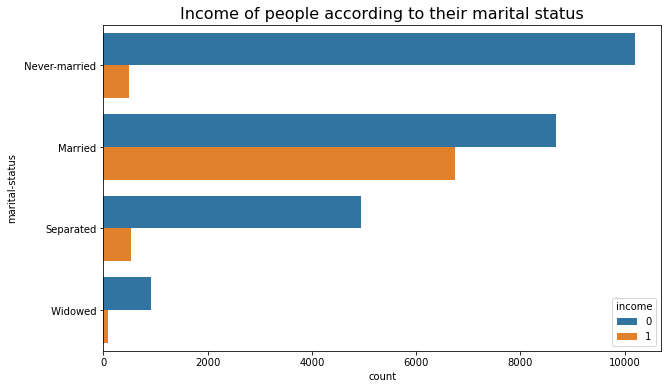

In [40]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their marital status", fontsize = 16)
sns.countplot(y = ds['marital-status'], hue = ds['income'])
plt.show()

In [41]:
marital_enc = (ds.groupby('marital-status').size()) / len(ds)
print(marital_enc)

ds['marital_enc'] = ds['marital-status'].apply(lambda x : marital_enc[x])
ds['marital_enc'].head(100)

marital-status
 Never-married    0.328092
 Widowed          0.030497
Married           0.473481
Separated         0.167931
dtype: float64


0     0.328092
1     0.473481
2     0.167931
3     0.473481
4     0.473481
        ...   
95    0.328092
96    0.473481
97    0.473481
98    0.167931
99    0.328092
Name: marital_enc, Length: 100, dtype: float64

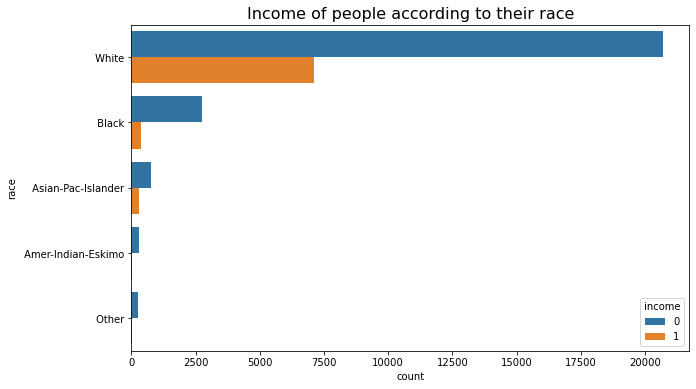

In [42]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their race", fontsize = 16)
sns.countplot(y = ds['race'], hue = ds['income'])
plt.show()

In [43]:
race_enc = (ds.groupby('race').size()) / len(ds)
print(race_enc)

ds['race_enc'] = ds['race'].apply(lambda x : race_enc[x])
ds['race_enc'].head(100)

race
 Amer-Indian-Eskimo    0.009551
 Asian-Pac-Islander    0.031909
 Black                 0.095943
 Other                 0.008323
 White                 0.854274
dtype: float64


0     0.854274
1     0.854274
2     0.854274
3     0.095943
4     0.095943
        ...   
95    0.854274
96    0.854274
97    0.854274
98    0.854274
99    0.095943
Name: race_enc, Length: 100, dtype: float64

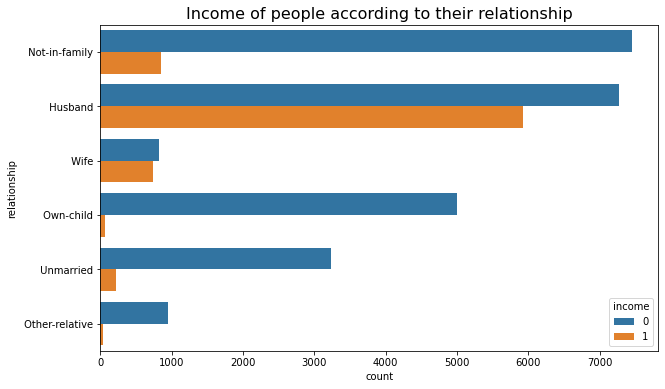

In [44]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their relationship", fontsize = 16)
sns.countplot(y = ds['relationship'], hue = ds['income'])
plt.show()

In [45]:
relationship_enc = (ds.groupby('relationship').size()) / len(ds)
print(relationship_enc)

ds['relationship_enc'] = ds['relationship'].apply(lambda x : relationship_enc[x])
ds['relationship_enc'].head(100)

relationship
 Husband           0.405178
 Not-in-family     0.255060
 Other-relative    0.030128
 Own-child         0.155646
 Unmarried         0.105832
 Wife              0.048156
dtype: float64


0     0.255060
1     0.405178
2     0.255060
3     0.405178
4     0.048156
        ...   
95    0.255060
96    0.405178
97    0.405178
98    0.105832
99    0.155646
Name: relationship_enc, Length: 100, dtype: float64

In [46]:
ds.drop(['occupation'], axis = 1, inplace = True)

In [47]:
ds.drop(['education'], axis = 1, inplace = True)

In [48]:
ds.drop(['race'], axis = 1, inplace = True)

In [49]:
ds.drop(['sex'], axis = 1, inplace = True)

In [50]:
ds.drop(['relationship'], axis = 1, inplace = True)

In [51]:
ds.drop(['marital-status'], axis = 1, inplace = True)

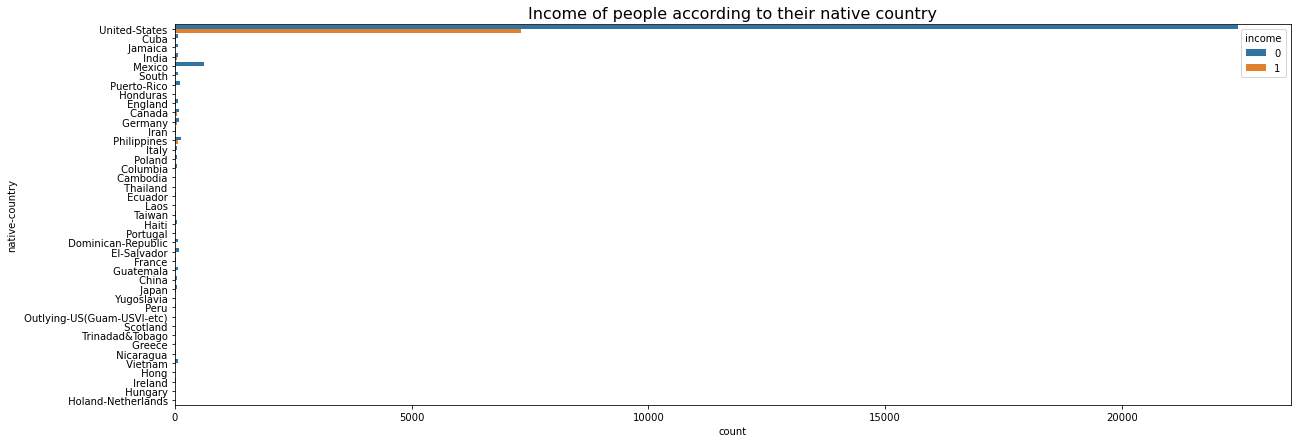

In [52]:
plt.figure(figsize = (20,7))
plt.title("Income of people according to their native country", fontsize 
          = 16)
sns.countplot(y = ds['native-country'], hue = data['income'])
plt.show()

In [53]:
native_enc = (ds.groupby('native-country').size()) / len(ds)
print(native_enc)

ds['native_enc'] = ds['native-country'].apply(lambda x : native_enc[x])
ds['native_enc'].head(100)

native-country
 Cambodia                      0.000584
 Canada                        0.003716
 China                         0.002303
 Columbia                      0.001812
 Cuba                          0.002918
 Dominican-Republic            0.002150
 Ecuador                       0.000860
 El-Salvador                   0.003255
 England                       0.002764
 France                        0.000891
 Germany                       0.004207
 Greece                        0.000891
 Guatemala                     0.001966
 Haiti                         0.001351
 Holand-Netherlands            0.000031
 Honduras                      0.000399
 Hong                          0.000614
 Hungary                       0.000399
 India                         0.003071
 Iran                          0.001321
 Ireland                       0.000737
 Italy                         0.002242
 Jamaica                       0.002488
 Japan                         0.001904
 Laos                    

0     0.913762
1     0.913762
2     0.913762
3     0.913762
4     0.002918
        ...   
95    0.913762
96    0.913762
97    0.913762
98    0.002764
99    0.913762
Name: native_enc, Length: 100, dtype: float64

In [54]:
ds.drop(['native-country'], axis = 1, inplace = True)

In [55]:
ds.head()

,Age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_enc,occupation_enc,education_enc,sex_enc,marital_enc,race_enc,relationship_enc,native_enc
0,39,77516,2174,0,40,0,0.133626,0.115783,0.164461,0.669205,0.328092,0.854274,0.255060,0.913762
1,50,83311,0,0,13,0,0.112312,0.124873,0.164461,0.669205,0.473481,0.854274,0.405178,0.913762
2,38,215646,0,0,40,0,0.753417,0.042075,0.416326,0.669205,0.167931,0.854274,0.255060,0.913762
3,53,234721,0,0,40,0,0.753417,0.042075,0.416326,0.669205,0.473481,0.095943,0.405178,0.913762
4,28,338409,0,0,40,0,0.753417,0.183747,0.164461,0.330795,0.473481,0.095943,0.048156,0.002918


In [56]:
plt.style.use('default')

In [57]:
plt.style.use('ggplot')

BoxPlots of the features:


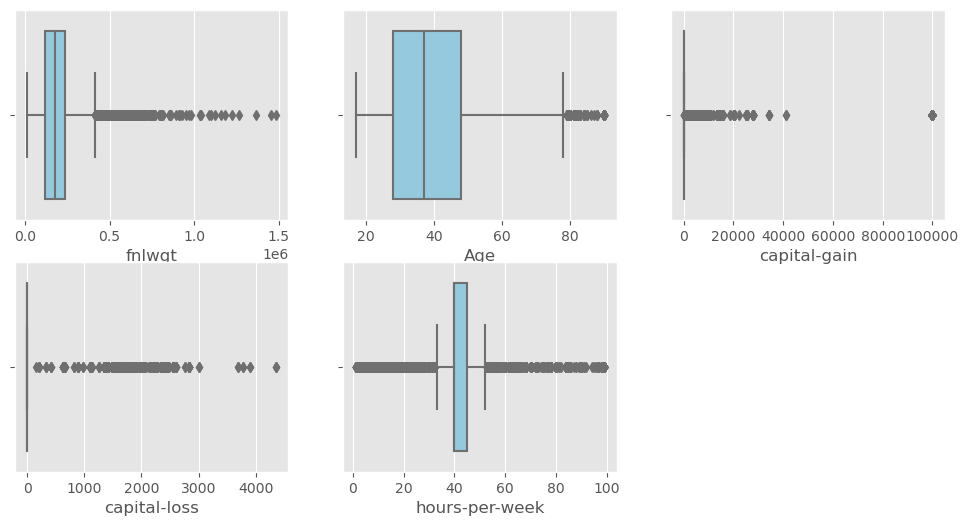

In [58]:
clist = ['fnlwgt','Age','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (12,6))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(ds[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

In [59]:
from scipy.stats import zscore
zabs = np.abs(zscore(ds.loc[:,'fnlwgt':'hours-per-week']))
print(np.shape(np.where(zabs >= 3)))
new_ds = ds[(zabs < 3).all(axis = 1)]
new_ds

(2, 2472)


,Age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_enc,occupation_enc,education_enc,sex_enc,marital_enc,race_enc,relationship_enc,native_enc
0,39,77516,2174,0,40,0,0.133626,0.115783,0.164461,0.669205,0.328092,0.854274,0.255060,0.913762
1,50,83311,0,0,13,0,0.112312,0.124873,0.164461,0.669205,0.473481,0.854274,0.405178,0.913762
2,38,215646,0,0,40,0,0.753417,0.042075,0.416326,0.669205,0.167931,0.854274,0.255060,0.913762
3,53,234721,0,0,40,0,0.753417,0.042075,0.416326,0.669205,0.473481,0.095943,0.405178,0.913762
4,28,338409,0,0,40,0,0.753417,0.183747,0.164461,0.330795,0.473481,0.095943,0.048156,0.002918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,0,0.753417,0.028500,0.032769,0.330795,0.473481,0.854274,0.048156,0.913762
32557,40,154374,0,0,40,1,0.753417,0.061485,0.416326,0.669205,0.473481,0.854274,0.405178,0.913762
32558,58,151910,0,0,40,0,0.753417,0.115783,0.416326,0.330795,0.030497,0.854274,0.105832,0.913762
32559,22,201490,0,0,20,0,0.753417,0.115783,0.416326,0.669205,0.328092,0.854274,0.155646,0.913762


In [60]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
new_ds.loc[:,'Age':'hours-per-week'] = scale.fit_transform(new_ds.loc[:,'Age':'hours-per-week'])
new_ds

,Age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_enc,occupation_enc,education_enc,sex_enc,marital_enc,race_enc,relationship_enc,native_enc
0,0.301370,0.132035,0.098639,0.0,0.493151,0,0.133626,0.115783,0.164461,0.669205,0.328092,0.854274,0.255060,0.913762
1,0.452055,0.143765,0.000000,0.0,0.123288,0,0.112312,0.124873,0.164461,0.669205,0.473481,0.854274,0.405178,0.913762
2,0.287671,0.411625,0.000000,0.0,0.493151,0,0.753417,0.042075,0.416326,0.669205,0.167931,0.854274,0.255060,0.913762
3,0.493151,0.450235,0.000000,0.0,0.493151,0,0.753417,0.042075,0.416326,0.669205,0.473481,0.095943,0.405178,0.913762
4,0.150685,0.660111,0.000000,0.0,0.493151,0,0.753417,0.183747,0.164461,0.330795,0.473481,0.095943,0.048156,0.002918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.495942,0.000000,0.0,0.465753,0,0.753417,0.028500,0.032769,0.330795,0.473481,0.854274,0.048156,0.913762
32557,0.315068,0.287604,0.000000,0.0,0.493151,1,0.753417,0.061485,0.416326,0.669205,0.473481,0.854274,0.405178,0.913762
32558,0.561644,0.282617,0.000000,0.0,0.493151,0,0.753417,0.115783,0.416326,0.330795,0.030497,0.854274,0.105832,0.913762
32559,0.068493,0.382972,0.000000,0.0,0.219178,0,0.753417,0.115783,0.416326,0.669205,0.328092,0.854274,0.155646,0.913762


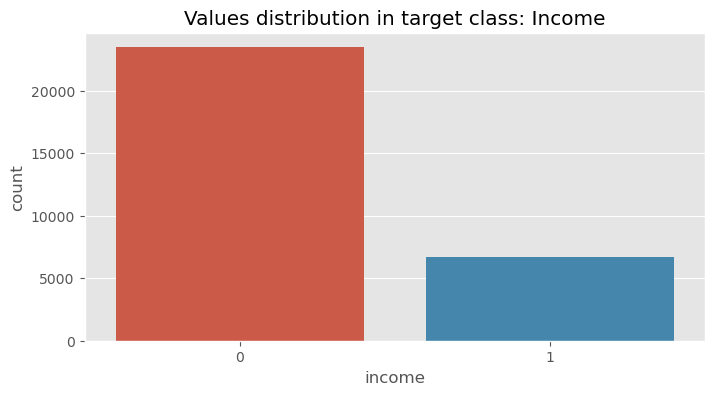

In [61]:
plt.figure(figsize = (8, 4))
plt.title("Values distribution in target class: Income")
sns.countplot(data = new_ds, x = 'income')
plt.show()

In [62]:
from imblearn.combine import SMOTETomek
x = new_ds.loc[:,"Age":"hours-per-week"]
y = new_ds.loc[:,"income"]
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)

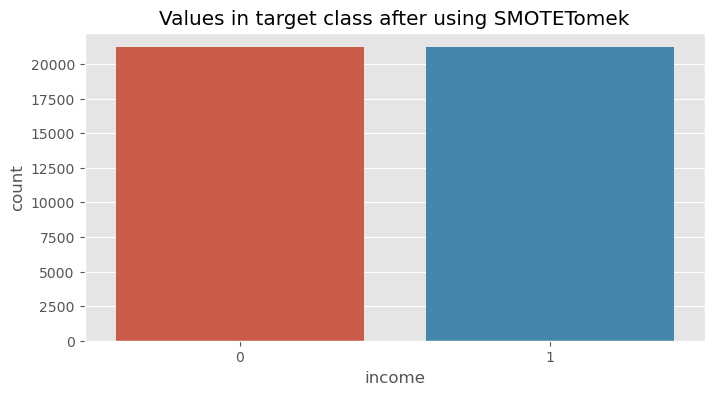

In [63]:
plt.figure(figsize = (8, 4))
plt.title("Values in target class after using SMOTETomek")
sns.countplot(x = y_new)
plt.show()

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 28, 71.99559852236108


# x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30, random_state = 67)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [66]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)

# For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model is", accuracy_score(y_test, pred_nb)*100)

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

Accuracy Score of Logistic Regression model is 71.17818124656135
Accuracy Score of Decision Tree Classifier model is 84.64984673426079
Accuracy Score of K-Nearest Neighbour Classifier model is 80.5706201367602
Accuracy Score of Support Vector Classifier model is 73.78762870392202
Accuracy Score of Random Forest model is 86.9134638057062
Accuracy Score of MultinomialNB model is 59.309911184469065
Accuracy Score of ADA Boost model is 75.40674369252535


In [67]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x_new, y_new, cv = 10) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x_new, y_new, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x_new, y_new, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x_new, y_new, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, x_new, y_new, cv = 10)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")

nb_scores = cross_val_score(nb, x_new, y_new, cv = 10)
print(nb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {nb_scores.mean()*100}\n")

ada_scores = cross_val_score(ada, x_new, y_new, cv = 10)
print(ada_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ada_scores.mean()*100}\n")

[0.70266447 0.71681207 0.71681207 0.69511908 0.70785192 0.70549399
 0.71020986 0.70832351 0.7115566  0.70589623]
Mean of accuracy scores is for Logistic Regression is 70.80739790811175

[0.7769394  0.78684273 0.82504126 0.88988446 0.89082763 0.87974534
 0.87974534 0.88398963 0.88490566 0.88773585]
Mean of accuracy scores is for Decision Tree Classifier is 85.85657307594774

[0.79957557 0.80523461 0.81065786 0.81773167 0.83070031 0.82409809
 0.81395897 0.81985381 0.82830189 0.8254717 ]
Mean of accuracy scores is for KNN Classifier is 81.75584478562816

[0.73591134 0.74722943 0.73685452 0.73614714 0.73614714 0.73567555
 0.73402499 0.72836595 0.73938679 0.72806604]
Mean of accuracy scores is for SVC Classifier is 73.57808878290541

[0.80806414 0.81961801 0.84484791 0.90827635 0.91841547 0.91252063
 0.90426786 0.90874794 0.91226415 0.9129717 ]
Mean of accuracy scores is for Random Forest Classifier is 88.49994160775537

[0.59632162 0.60551757 0.60410281 0.58406036 0.59278472 0.59585004
 0.

In [68]:
# Checking for difference between accuracy and mean accuracies.
lis3 = ['Logistic Regression','Decision Tree Classifier','KNeighbors Classifier','SVC', 'Random Forest Classifier', 
        'MultinomialNB', 'ADA Boost Classifier']

lis1 = [accuracy_score(y_test, pred_lg)*100, accuracy_score(y_test, pred_dtc)*100, accuracy_score(y_test, pred_knc)*100, 
        accuracy_score(y_test, pred_svc)*100, accuracy_score(y_test, pred_rfc)*100, accuracy_score(y_test, pred_nb)*100,
        accuracy_score(y_test, pred_ada)*100]

lis2 = [lg_scores.mean()*100, dtc_scores.mean()*100, knc_scores.mean()*100, svc_scores.mean()*100, rfc_scores.mean()*100, 
        nb_scores.mean()*100, ada_scores.mean()*100]

for i in range(0, 7):
    dif = (lis1[i]) - (lis2[i])
    print(lis3[i], dif)

Logistic Regression 0.37078333844959843
Decision Tree Classifier -1.2067263416869451
KNeighbors Classifier -1.1852246488679583
SVC 0.20953992101661356
Random Forest Classifier -1.586477802049174
MultinomialNB -0.1600056872192539
ADA Boost Classifier 0.4539012692805784


In [69]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param = dict()
param['criterion'] = ['gini', 'entropy']
param['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
param['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]


gs = GridSearchCV(estimator = rfc, param_grid = param, scoring='f1', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8614803588007411
{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 100}


In [70]:
rfc = RandomForestClassifier(criterion = 'entropy', min_samples_split = 2, n_estimators = 100)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
pred_rfc = rfc.predict(x_test)

0.9970355398349334


Accuracy Score of RFC model is 87.10209856165999
Confusion matrix for RFC Model is
[[5486  883]
 [ 758 5596]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6369
           1       0.86      0.88      0.87      6354

    accuracy                           0.87     12723
   macro avg       0.87      0.87      0.87     12723
weighted avg       0.87      0.87      0.87     12723



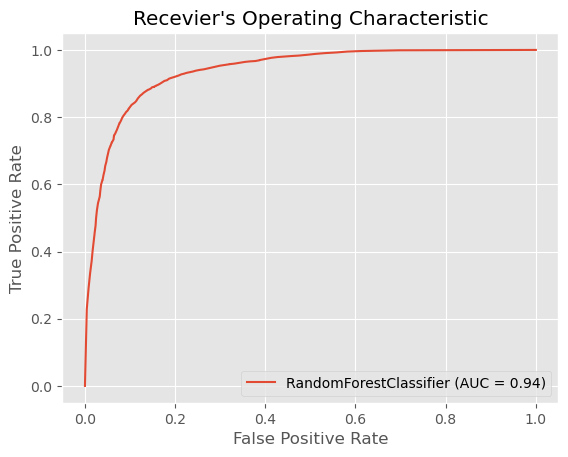

In [71]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_rfc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_rfc))

plot_roc_curve(rfc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()